In [75]:
import pandas as pd
import numpy as np


In [76]:
df = pd.read_csv('AXISX_resample.csv')
df_np = np.array(df)


In [77]:
# AXISX - 1 (CHIP WIRE 구분 X)
cls1 = df_np[df_np[:,3] == 1, :]
print(cls1)
print(cls1.shape)
cls2 = df_np[df_np[:, 3] == 2, :]
cls3 = df_np[df_np[:, 3] == 3, :]
cls4 = df_np[df_np[:, 3] == 4, :]
cls5 = df_np[df_np[:, 3] == 5, :]
cls6 = df_np[df_np[:, 3] == 6, :]
cls7 = df_np[df_np[:, 3] == 7, :]

[['CHIP1' 'WIRE10' 'AXISX' 1 1.873603]
 ['CHIP1' 'WIRE10' 'AXISX' 1 2.015115]
 ['CHIP1' 'WIRE10' 'AXISX' 1 2.033436]
 ...
 ['CHIP10' 'WIRE9' 'AXISX' 1 3.107723]
 ['CHIP10' 'WIRE9' 'AXISX' 1 3.2277549999999997]
 ['CHIP10' 'WIRE9' 'AXISX' 1 3.323781]]
(36793, 5)


In [78]:
def Labeling(label, ran):
    lst = []
    for i in range(ran):
        num = i + 1
        s = '{0}{1}'.format(label, num)
        lst.append(s)
    return lst
chip = Labeling('CHIP', 10)
wire = Labeling('WIRE', 19)
print(chip)
print(wire)

['CHIP1', 'CHIP2', 'CHIP3', 'CHIP4', 'CHIP5', 'CHIP6', 'CHIP7', 'CHIP8', 'CHIP9', 'CHIP10']
['WIRE1', 'WIRE2', 'WIRE3', 'WIRE4', 'WIRE5', 'WIRE6', 'WIRE7', 'WIRE8', 'WIRE9', 'WIRE10', 'WIRE11', 'WIRE12', 'WIRE13', 'WIRE14', 'WIRE15', 'WIRE16', 'WIRE17', 'WIRE18', 'WIRE19']


In [79]:
# 1번 class에서 chip 10개로 나눔
## 목표 :총 10개의 ( chip1, chip2, ... chip10) 을 기준으로 나누어진 배열을 저장한 리스트 생성
## 3차원 이고 각 배열마다 행이 다름 (10, 가변길이, 5)
def split_out_chip(df, labels):
    cls_sp = []
    for label in labels:
        c = df[df[:, 0] == label, :]
        cls_sp.append(c)
    return cls_sp

def split_out_wire(df, labels):
    cls_sp = []
    for i in range(df.shape[0]):
        dfdf = df[i]
        for label in labels:
            c = dfdf[dfdf[:, 1] == label, :]
            cls_sp.append(c)
    return cls_sp

def split_out(df, chips, wires):
    # CHIP 분류
    cls_c = split_out_chip(df, chips)
    # WIRE 분류
    cls_c_df = np.array(cls_c) ## DataFrame 형식으로 변경
    cls_c_w = split_out_wire(cls_c_df, wires)
    cls_c_w = np.array(cls_c_w)
    return cls_c_w

In [80]:
cls1_c_w = split_out(cls1, chip, wire)
cls2_c_w = split_out(cls2, chip, wire)
cls3_c_w = split_out(cls3, chip, wire)
cls4_c_w = split_out(cls4, chip, wire)
cls5_c_w = split_out(cls5, chip, wire)
cls6_c_w = split_out(cls6, chip, wire)
cls7_c_w = split_out(cls7, chip, wire)

In [81]:
# class1 에서 각 조합 chip wire 에 대하여 데이터 개수 출력하기
from statistics import median
def print_class_info(cls_df, num=190):
    shape = []
    for i in range(num):
        df = cls_df[i]
        #print("{0}. {1}".format(i+1, df.shape))
        shape.append(df.shape[0])
    print('클래스별 조합 데이터 개수 합: ', sum(shape))
    avg = sum(shape) / num
    print('클래스별 조합 데이터 개수 평균 : ', int(avg * 100) / 100)
    print('최대값 : {}\n최소값 : {}'.format(max(shape), min(shape)))
    print('중간값 : {}'.format(median(shape)))
    print('최대 최소 편차 : {}'.format(max(shape) - min(shape)))

In [82]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [83]:
c2_df = pd.Series(dtype=object)
for data in cls2_c_w:
    c2_df = pd.concat([c2_df, pd.DataFrame(data[:, 4].reshape(1, -1))])
c2_df = c2_df.reset_index().drop('index', axis=1)
c2_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
0,3.42423,3.43623,3.39675,3.32694,3.23944,3.13931,3.01802,2.90146,2.76152,2.59474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.41507,3.43876,3.41222,3.36484,3.30293,3.2148,3.12288,2.99306,2.85787,2.68477,...,3.23944,3.29156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.42707,3.44097,3.40717,3.35505,3.29061,3.19522,3.09951,2.98485,2.84618,2.66834,...,3.28208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.42454,3.42865,3.42107,3.37242,3.28619,3.17248,3.05371,2.95105,2.81428,2.64402,...,3.25839,3.31304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.4277,3.43781,3.42549,3.38696,3.33547,3.24165,3.10772,2.97411,2.83923,2.69867,...,3.21164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.4217,3.43971,3.42865,3.39769,3.33515,3.25271,3.15953,3.04328,2.90841,2.74794,...,3.22712,3.27514,3.31272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.42739,3.44287,3.42391,3.37116,3.30862,3.23186,3.13931,3.0177,2.87177,2.72015,...,3.27103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.41096,3.41886,3.41222,3.3939,3.34305,3.26218,3.16774,3.04739,2.9182,2.77195,...,3.23439,3.28903,3.3222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.4157,3.43497,3.42202,3.39011,3.33263,3.24734,3.13015,3.01328,2.89482,2.75679,...,3.24323,3.28524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.41759,3.41791,3.41254,3.37969,3.3143,3.22554,3.1052,2.9839,2.84492,2.69298,...,3.22902,3.29377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
c2_np = to_time_series_dataset(c2_df)
c2_np.shape

(190, 335, 1)

In [85]:
c6_df = pd.Series(dtype=object)
for data in cls6_c_w:
    c6_df = pd.concat([c6_df, pd.DataFrame(data[:, 4].reshape(1, -1))])
c6_df = c6_df.reset_index().drop('index', axis=1)
c6_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.268332,0.230743,0.280651,0.399104,0.50587,0.557673,0.553882,0.636641,0.797105,1.00653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.284442,0.23327,0.281915,0.411423,0.510608,0.54567,0.523874,0.596525,0.781312,0.988841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.275282,0.215581,0.254118,0.357093,0.447433,0.476177,0.442063,0.487865,0.631903,0.853963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.284758,0.243062,0.297709,0.397841,0.447433,0.422163,0.406685,0.47523,0.641379,0.826482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.334034,0.277493,0.311607,0.421531,0.58389,0.701711,0.732035,0.772151,0.902291,1.1174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.319504,0.245905,0.256013,0.347301,0.403211,0.390891,0.353618,0.378888,0.483758,0.647697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.291075,0.257593,0.327401,0.404158,0.407949,0.365622,0.355198,0.437641,0.632219,0.796789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.286653,0.232007,0.270228,0.385522,0.485022,0.520716,0.534298,0.613267,0.786366,1.00874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.291707,0.23864,0.286969,0.366253,0.41016,0.392155,0.370991,0.419636,0.591156,0.777521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.332455,0.24022,0.24938,0.343826,0.446169,0.503027,0.5403,0.574098,0.662543,0.833747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
c6_np = to_time_series_dataset(c6_df)
c6_np.shape

(190, 187, 1)

In [87]:
c26_df = pd.concat([c2_df, c6_df])
c26_df = c26_df.reset_index().drop('index', axis=1)
c26_df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
370,0.382679,0.316977,0.326453,0.373518,0.397525,0.369728,0.325506,0.399104,0.574098,0.779416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,0.310344,0.238956,0.282863,0.374466,0.407001,0.411739,0.433219,0.528928,0.685602,0.877021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,0.295813,0.291707,0.351091,0.503974,0.704554,0.843539,0.910504,0.967045,1.12719,1.372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,0.256645,0.226005,0.284126,0.417109,0.533982,0.577889,0.58926,0.682759,0.862175,1.10887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,0.312871,0.266437,0.311291,0.441747,0.612635,0.762043,0.83122,0.862807,0.972731,1.18215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,0.308448,0.227269,0.27844,0.342247,0.397841,0.433219,0.433219,0.481231,0.606317,0.802159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,0.334034,0.288548,0.31445,0.366885,0.37952,0.357409,0.352987,0.412687,0.56557,0.787313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,0.253486,0.231059,0.308132,0.482179,0.606317,0.663175,0.685286,0.793947,0.997053,1.22669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,0.295813,0.261067,0.301499,0.367833,0.396893,0.392471,0.409528,0.479336,0.627165,0.833115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,0.322979,0.28539,0.318872,0.454698,0.651487,0.787945,0.845118,0.902923,1.05328,1.29113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
c26_np = to_time_series_dataset(c26_df)
c26_np.shape

(380, 335, 1)

In [168]:
X = TimeSeriesScalerMeanVariance().fit_transform(c26_np)

In [169]:
X = TimeSeriesResampler(sz=100).fit_transform(X)

In [170]:
km = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=0).fit(X)

In [171]:
X_ = np.reshape(X, (380, -1))
df = pd.DataFrame(X_)

In [172]:
df['cluster'] = km.labels_
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,cluster
0,1.477747,1.401832,1.154294,0.817919,0.311680,-0.215811,-0.727321,-1.083801,-1.305478,-1.334833,...,-1.396502,-1.392731,-1.183414,-0.790826,-0.299863,0.300358,0.797245,1.176434,1.371832,0
1,1.464345,1.404403,1.141449,0.688641,0.111297,-0.509707,-0.939413,-1.238414,-1.254574,-1.056021,...,-1.209597,-1.412266,-1.368963,-1.035829,-0.529434,0.068297,0.701544,1.123050,1.356046,0
2,1.472578,1.393391,1.128238,0.635838,0.089795,-0.551088,-0.942572,-1.232830,-1.246940,-1.056087,...,-1.105096,-1.386974,-1.412807,-1.150501,-0.682319,-0.056966,0.578329,1.053138,1.345356,0
3,1.470804,1.402954,1.092899,0.640846,0.023113,-0.543096,-1.005725,-1.249468,-1.237362,-1.027706,...,-1.207292,-1.400145,-1.365481,-1.036326,-0.520289,0.085916,0.734058,1.128257,1.373033,0
4,1.477701,1.429174,1.130647,0.725898,0.108597,-0.490418,-0.949879,-1.231279,-1.242518,-1.058727,...,-1.066482,-1.377006,-1.417060,-1.192121,-0.734735,-0.154498,0.504229,0.996321,1.288138,0
5,1.459081,1.421452,1.167720,0.731566,0.132770,-0.465741,-0.946551,-1.229293,-1.264072,-1.077525,...,-1.242046,-1.439249,-1.338467,-0.983862,-0.428723,0.230358,0.772583,1.184263,1.363624,0
6,1.474190,1.409316,1.160974,0.723374,0.113840,-0.487988,-0.949917,-1.232539,-1.245398,-1.044656,...,-1.175333,-1.412891,-1.388699,-1.093206,-0.590459,-0.004154,0.650016,1.068567,1.336957,0
7,1.448705,1.420280,1.171915,0.735161,0.154146,-0.457900,-0.939881,-1.211139,-1.270888,-1.074982,...,-1.274089,-1.432269,-1.320397,-0.925459,-0.421790,0.298130,0.807279,1.194239,1.370997,0
8,1.462170,1.424966,1.151724,0.752429,0.141421,-0.462256,-0.918579,-1.219282,-1.253122,-1.084910,...,-1.209433,-1.423747,-1.356707,-1.048531,-0.494371,0.121681,0.717248,1.123119,1.347771,0
9,1.459541,1.409535,1.123475,0.692875,0.065654,-0.513265,-0.982280,-1.227277,-1.253109,-1.063962,...,-1.237634,-1.421415,-1.350686,-0.990625,-0.460597,0.196153,0.747036,1.138569,1.351022,0


In [173]:
df_0 = df[df['cluster'] == 0].drop('cluster', axis=1)
df_1 = df[df['cluster'] == 1].drop('cluster', axis=1)

np1 = df_1.values
np0 = df_0.values

In [174]:
centers = km.cluster_centers_.reshape(2, -1)
print(centers)

[[ 1.47115085  1.43747722  1.23055325  0.86757282  0.45606207  0.05614914
  -0.49119677 -0.92000644 -1.21304827 -1.3449585  -1.25228481 -0.9723981
  -0.55021209 -0.03270202  0.45045571  0.90426582  1.22934427  1.37627789
   1.35410331  1.1471136   0.76792086  0.26215522 -0.2741282  -0.76657243
  -1.13579251 -1.37180908 -1.40390224 -1.25923266 -0.92623712 -0.46977395
   0.08715943  0.62418289  1.06308803  1.31952173  1.38221981  1.30248173
   1.01884948  0.57021196  0.04320207 -0.5420746  -0.95502015 -1.27190724
  -1.4121554  -1.38068342 -1.14854496 -0.73924747 -0.25840337  0.31418784
   0.81905247  1.19529133  1.37344235  1.37131763  1.18846997  0.80992587
   0.35463002 -0.23364083 -0.69031494 -1.10273252 -1.36271315 -1.41910096
  -1.29894568 -0.97344195 -0.50124981  0.0049018   0.58386237  1.03802966
   1.31771681  1.38917473  1.31542275  1.04109418  0.59538541  0.04838461
  -0.51859619 -0.98484317 -1.29211829 -1.41807885 -1.37902001 -1.14239863
  -0.72218281 -0.20399586  0.39936417  

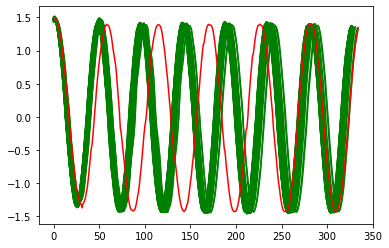

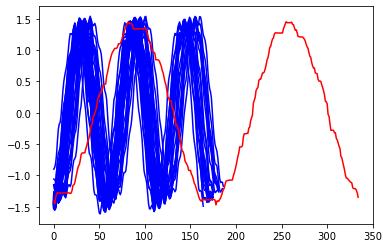

(190, 335)
(190, 335)


In [97]:
import matplotlib.pyplot as plt
for data in np0:
  plt.plot(data, 'g')
plt.plot(centers[0], 'r')
plt.show()

for data in np1:
  plt.plot(data, 'b')
plt.plot(centers[1], 'r')
plt.show()

print(np0.shape)
print(np1.shape)

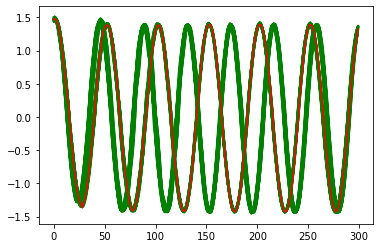

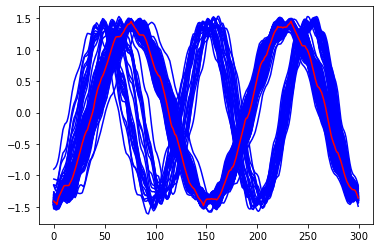

(190, 300)
(190, 300)


In [167]:
for data in np0:
  plt.plot(data, 'g')
plt.plot(centers[0], 'r')
plt.show()

for data in np1:
  plt.plot(data, 'b')
plt.plot(centers[1], 'r')
plt.show()

print(np0.shape)
print(np1.shape)

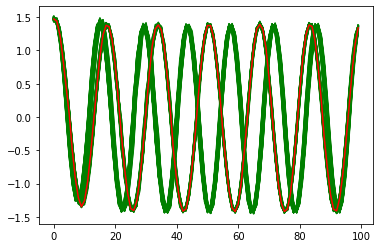

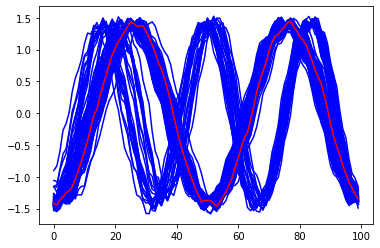

(190, 100)
(190, 100)


In [175]:
for data in np0:
  plt.plot(data, 'g')
plt.plot(centers[0], 'r')
plt.show()

for data in np1:
  plt.plot(data, 'b')
plt.plot(centers[1], 'r')
plt.show()

print(np0.shape)
print(np1.shape)

In [176]:
c_df = pd.Series(dtype=object)
for cls in [cls1_c_w, cls2_c_w, cls3_c_w, cls4_c_w, cls5_c_w, cls6_c_w, cls7_c_w]:
    for data in cls:
        c_df = pd.concat([c_df, pd.DataFrame(data[:, 4].reshape(1, -1))])
    
c_df = c_df.reset_index().drop('index', axis=1)
c_df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230
1325,0.313818,0.254118,0.267385,0.338141,0.392471,0.384574,0.320136,0.348248,0.471755,0.676126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326,0.316977,0.272755,0.315398,0.374782,0.399104,0.356777,0.320136,0.388996,0.537457,0.71024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,0.237693,0.218108,0.282547,0.395314,0.493235,0.526085,0.539036,0.595262,0.748145,0.984103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,0.277809,0.246853,0.301815,0.366885,0.386469,0.352671,0.317293,0.373518,0.526085,0.708029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,0.31445,0.242431,0.26012,0.395314,0.542511,0.630324,0.678337,0.72635,0.849856,1.03022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
c_np = to_time_series_dataset(c_df)
c_np.shape

(1330, 1231, 1)

In [178]:
X = TimeSeriesScalerMeanVariance().fit_transform(c_np)

In [185]:
X = TimeSeriesResampler(sz=150).fit_transform(X)

In [191]:
km = TimeSeriesKMeans(n_clusters=7, metric="softdtw",metric_params={"gamma": .01}, random_state=0).fit(X)

In [192]:
X_ = np.reshape(X, (1330, -1))
df = pd.DataFrame(X_)
df['cluster'] = km.labels_
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,cluster
0,-0.542642,-0.475787,-0.607266,-0.666477,-0.575650,-0.497910,-0.594371,-0.684056,-0.689309,-0.652415,...,-0.059441,0.296533,0.581841,0.833002,1.046014,1.250730,1.427277,1.522584,1.569656,2
1,0.068235,0.456353,0.387300,0.227766,0.157730,0.213592,0.185517,0.014934,-0.247856,-0.308055,...,0.435252,0.644884,0.857295,1.065087,1.251528,1.415442,1.556076,1.660878,1.713674,2
2,-0.246381,0.061791,0.016725,-0.107063,-0.059411,0.052651,0.045136,-0.112307,-0.303297,-0.357425,...,0.630580,0.850310,1.024361,1.200103,1.382513,1.561343,1.692137,1.762816,1.819820,2
3,-0.032628,0.203543,0.085247,-0.084805,0.047829,0.236964,0.297553,0.147008,-0.077773,-0.236259,...,0.643909,0.847673,1.024391,1.201179,1.366330,1.519308,1.651178,1.735420,1.789407,2
4,-0.247104,0.303929,0.240194,0.074509,0.080778,0.326959,0.448403,0.351906,0.133019,-0.032905,...,0.605836,0.801172,0.999339,1.186983,1.344893,1.500194,1.652549,1.751908,1.817516,2
5,0.033905,0.055051,-0.131217,0.000703,0.252789,0.373506,0.260073,0.049629,-0.071404,-0.043940,...,0.359167,0.563630,0.770524,0.977034,1.160011,1.334197,1.472275,1.589270,1.667966,2
6,-0.163713,0.257267,0.104281,-0.014622,0.090864,0.282438,0.337528,0.176793,-0.010187,-0.054082,...,0.554252,0.755180,0.958782,1.165407,1.353223,1.512614,1.641104,1.745526,1.805033,2
7,-0.083528,0.167451,0.180609,0.039113,-0.066065,-0.077959,-0.104801,-0.236387,-0.344537,-0.387050,...,0.362498,0.576916,0.788792,0.976773,1.156620,1.317267,1.449126,1.553663,1.641076,2
8,0.199866,0.026825,-0.187801,-0.136997,0.201030,0.375713,0.293307,0.087769,-0.047425,-0.115471,...,0.640011,0.817093,1.010524,1.202293,1.374984,1.546046,1.684675,1.780642,1.844999,2
9,0.014333,0.173993,0.165781,0.097026,0.119003,0.150602,0.079039,-0.115129,-0.280061,-0.352106,...,0.528402,0.723525,0.925194,1.107065,1.265796,1.397680,1.531295,1.629729,1.691430,2


In [193]:
df_0 = df[df['cluster'] == 0].drop('cluster', axis=1)
df_1 = df[df['cluster'] == 1].drop('cluster', axis=1)
df_2 = df[df['cluster'] == 2].drop('cluster', axis=1)
df_3 = df[df['cluster'] == 3].drop('cluster', axis=1)
df_4 = df[df['cluster'] == 4].drop('cluster', axis=1)
df_5 = df[df['cluster'] == 5].drop('cluster', axis=1)
df_6 = df[df['cluster'] == 6].drop('cluster', axis=1)

np0 = df_0.values
np1 = df_1.values
np2 = df_2.values
np3 = df_3.values
np4 = df_4.values
np5 = df_5.values
np6 = df_6.values

In [194]:
centers = km.cluster_centers_.reshape(7, -1)

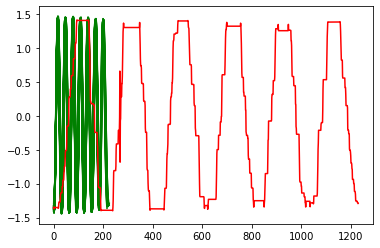

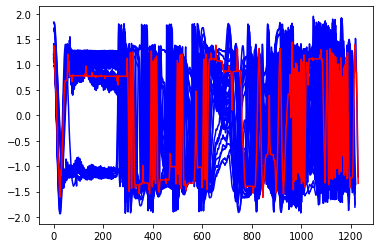

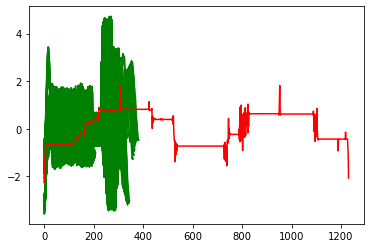

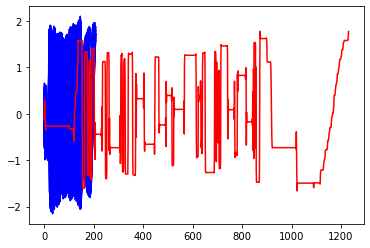

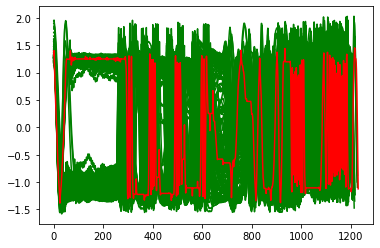

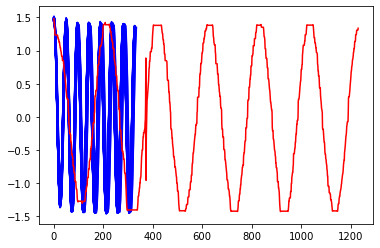

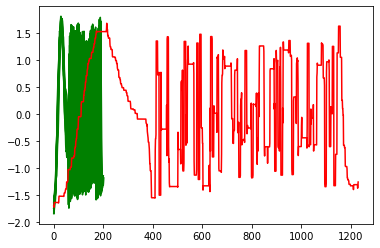

(190, 1231)
(50, 1231)
(552, 1231)
(190, 1231)
(140, 1231)
(190, 1231)
(18, 1231)


In [111]:
for data in np0:
  plt.plot(data, 'g')
plt.plot(centers[0], 'r')
plt.show()

for data in np1:
  plt.plot(data, 'b')
plt.plot(centers[1], 'r')
plt.show()

for data in np2:
  plt.plot(data, 'g')
plt.plot(centers[2], 'r')
plt.show()

for data in np3:
  plt.plot(data, 'b')
plt.plot(centers[3], 'r')
plt.show()

for data in np4:
  plt.plot(data, 'g')
plt.plot(centers[4], 'r')
plt.show()

for data in np5:
  plt.plot(data, 'b')
plt.plot(centers[5], 'r')
plt.show()

for data in np6:
  plt.plot(data, 'g')
plt.plot(centers[6], 'r')
plt.show()

print(np0.shape)
print(np1.shape)
print(np2.shape)
print(np3.shape)
print(np4.shape)
print(np5.shape)
print(np6.shape)

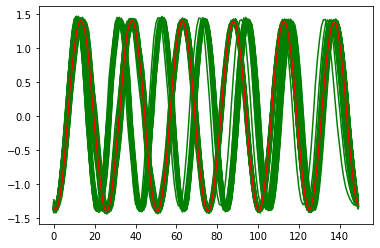

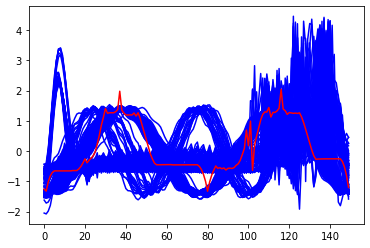

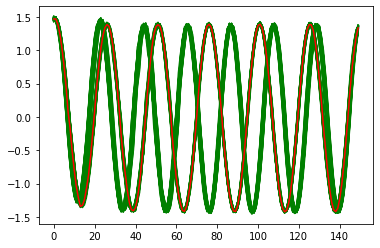

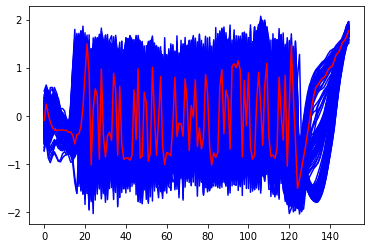

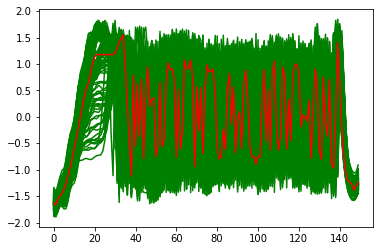

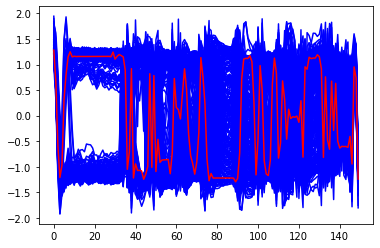

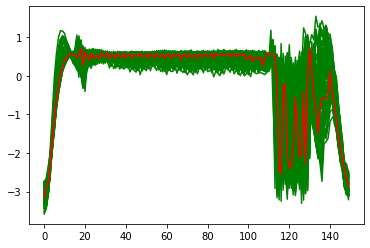

(190, 150)
(266, 150)
(190, 150)
(190, 150)
(190, 150)
(190, 150)
(114, 150)


In [190]:
for data in np0:
  plt.plot(data, 'g')
plt.plot(centers[0], 'r')
plt.show()

for data in np1:
  plt.plot(data, 'b')
plt.plot(centers[1], 'r')
plt.show()

for data in np2:
  plt.plot(data, 'g')
plt.plot(centers[2], 'r')
plt.show()

for data in np3:
  plt.plot(data, 'b')
plt.plot(centers[3], 'r')
plt.show()

for data in np4:
  plt.plot(data, 'g')
plt.plot(centers[4], 'r')
plt.show()

for data in np5:
  plt.plot(data, 'b')
plt.plot(centers[5], 'r')
plt.show()

for data in np6:
  plt.plot(data, 'g')
plt.plot(centers[6], 'r')
plt.show()

print(np0.shape)
print(np1.shape)
print(np2.shape)
print(np3.shape)
print(np4.shape)
print(np5.shape)
print(np6.shape)

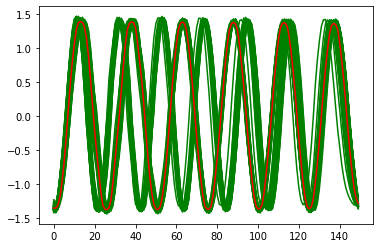

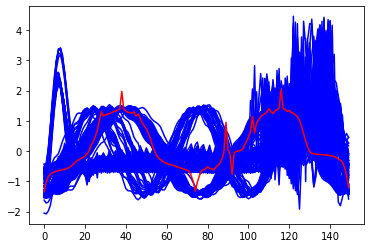

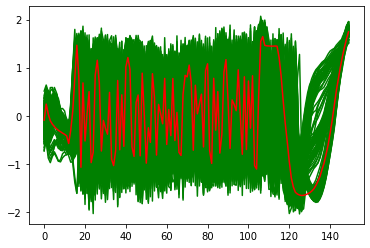

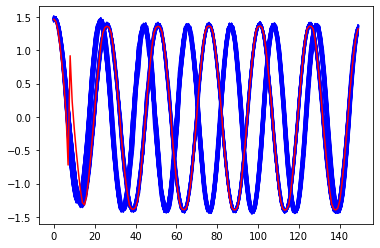

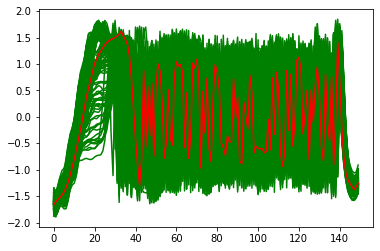

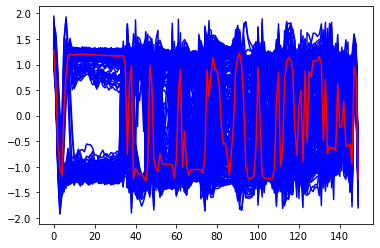

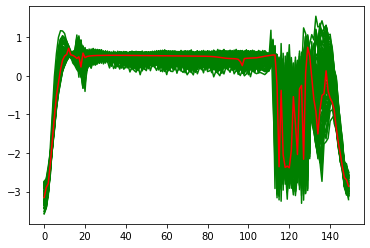

(190, 150)
(266, 150)
(190, 150)
(190, 150)
(190, 150)
(190, 150)
(114, 150)


In [195]:
for data in np0:
  plt.plot(data, 'g')
plt.plot(centers[0], 'r')
plt.show()

for data in np1:
  plt.plot(data, 'b')
plt.plot(centers[1], 'r')
plt.show()

for data in np2:
  plt.plot(data, 'g')
plt.plot(centers[2], 'r')
plt.show()

for data in np3:
  plt.plot(data, 'b')
plt.plot(centers[3], 'r')
plt.show()

for data in np4:
  plt.plot(data, 'g')
plt.plot(centers[4], 'r')
plt.show()

for data in np5:
  plt.plot(data, 'b')
plt.plot(centers[5], 'r')
plt.show()

for data in np6:
  plt.plot(data, 'g')
plt.plot(centers[6], 'r')
plt.show()

print(np0.shape)
print(np1.shape)
print(np2.shape)
print(np3.shape)
print(np4.shape)
print(np5.shape)
print(np6.shape)

In [146]:
c3_df = pd.Series(dtype=object)
for data in cls3_c_w:
    c3_df = pd.concat([c3_df, pd.DataFrame(data[:, 4].reshape(1, -1))])
c3_df = c3_df.reset_index().drop('index', axis=1)
c3_np = to_time_series_dataset(c3_df)
c3_np.shape

(190, 1231, 1)

In [156]:
C3 = TimeSeriesScalerMeanVariance().fit_transform(c3_np)

In [182]:
C3_re = TimeSeriesResampler(sz=200).fit_transform(C3)

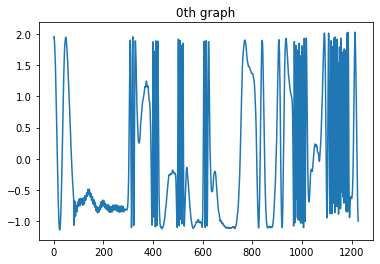

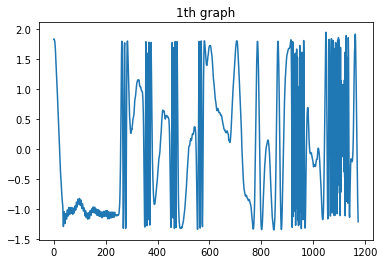

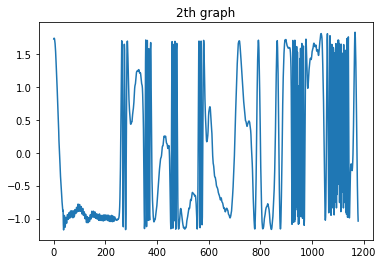

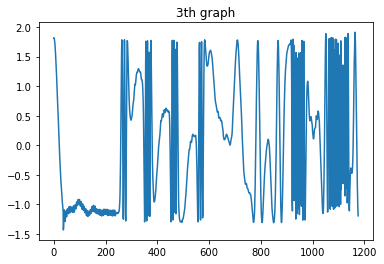

In [183]:
for idx, data in enumerate(C3.reshape(190, -1)):
    plt.title("{}th graph".format(idx))
    plt.plot(data)
    plt.show()
    if idx == 3:
        break


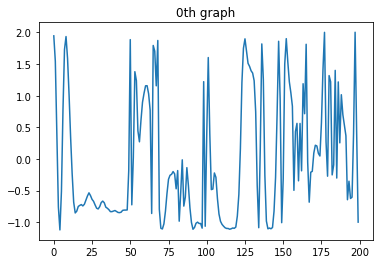

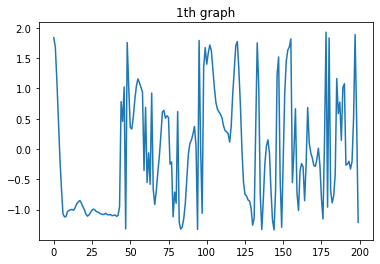

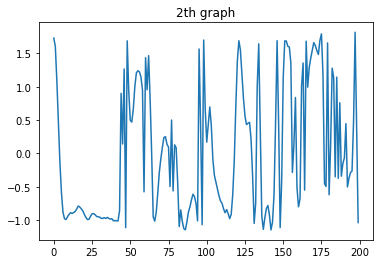

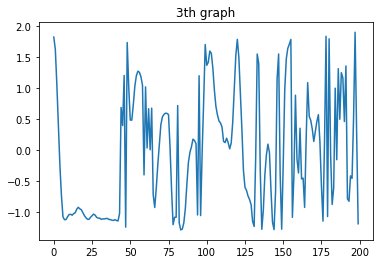

In [184]:
for idx, data in enumerate(C3_re.reshape(190, -1)):
    plt.title("{}th graph".format(idx))
    plt.plot(data)
    plt.show()
    if idx == 3:
        break


In [144]:
test = np.array([
    np.array([ [1],[2],[3] ]),
    np.array([ [1], [2], [3] ]),
    np.array([ [2], [5], [6]])
])
print(test)

[[[1]
  [2]
  [3]]

 [[1]
  [2]
  [3]]

 [[2]
  [5]
  [6]]]


In [145]:
km = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=0).fit(test)